### Here in order to learn more about how each of the evaluation metric works I have chosen a simple dataset.   
The dataset is Social Network Ads which predicts whether the customer will purchase a product or not given his gender, age and salary. 
To evaluate it with all the metrics I have choosen a binary classification.

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Fitting Decision Tree Classification to the Training set
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

### 1. Confusion Matrix Evaluation

In [3]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[62  6]
 [ 3 29]]


### 2. Accuracy Evaluation

In [5]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.91


### 3. Precision Evaluation

In [7]:
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred)
print(precision)

0.8285714285714286


### 4. Recall Evaluation

In [8]:
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred)
print(recall)

0.90625


### 5. F1-score Evaluation

In [9]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred)
print(f1)

0.8656716417910447


### 6. Specificity Evaluation

In [11]:
specificity = cm[1,1]/(cm[1,1]+cm[0,1])
print(specificity)

0.8285714285714286


### 7. Logarithmic Loss Evaluation

In [19]:
from math import log

# calculate binary cross entropy
def binary_cross_entropy(actual, predicted):
	sum_score = 0.0
	for i in range(len(actual)):
		sum_score += actual[i] * log(1e-15 + predicted[i])
	mean_sum_score = 1.0 / len(actual) * sum_score
	return -mean_sum_score
 
loss = binary_cross_entropy(y_test, y_pred)
print(loss)



1.0361632918473205


### 8. Area Under Curve (AUC) Evaluation

0.9090073529411765


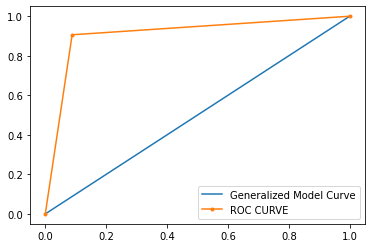

In [17]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

auc = roc_auc_score(y_test, y_pred)
print(auc)

fpr,tpr,threshold=roc_curve(y_test, y_pred)
plt.plot([0,1],[0,1],linestyle="-",label="Generalized Model Curve")
plt.plot(fpr,tpr,marker=".",label="ROC CURVE")
plt.legend()
plt.show()